**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "umap"
)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_log2p.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_mean0.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_zscore.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_015.coverage.encode_chipseq_full_zscore.tsv 
umap.metric_euclidean.neighbors_015.coverage.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_log2p.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_mean0.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_zscore.fcc_zscore.tss.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_zscore.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_050.coverage.encode_chipseq_full_zscore.tsv 
umap.metric_euclidean.neighbors_050.coverage.fcc_zscore.tsv 
umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.merge.encode_chipseq_full_log2p.fcc_zscore.tss.encode_chromatin_states.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_merge = dat
print(dim(dat))
head(dat)

[1] 150041    555


Region                   H2AFZ      H3K27ac  H3K27me3  H3K36me3  H3K4me1 
1 chr1:100028014-100029653 0.93242936 1.202217 0.3674175 1.1781314 1.510638
2 chr1:100036895-100039189 2.89957396 3.910099 0.4091536 1.1978119 1.069881
3 chr1:100046252-100046533 0.04290946 1.091537 0.4388560 0.5386822 2.148905
4 chr1:100048290-100048918 0.50936952 1.485267 0.5898186 1.1814556 1.987656
5 chr1:100050225-100050529 0.85668617 1.725008 0.2278687 1.9307771 1.923699
6 chr1:100064757-100065161 0.42353622 1.240632 0.4025945 1.5630312 1.592914
  H3K4me2   H3K4me3   H3K79me2  H3K9ac   ⋯ PLS Quies ReprPC Tss TssFlnk
1 0.6818927 0.5918414 0.3212089 1.029037 ⋯ 0   1     0      0   0      
2 4.9478111 5.5219678 4.1772959 4.663171 ⋯ 1   0     0      1   0      
3 1.2418524 1.1294906 3.5795422 1.101003 ⋯ 0   1     0      0   0      
4 1.4118059 0.9708391 3.5167590 1.229560 ⋯ 0   1     0      0   0      
5 1.8979684 1.0077673 3.0457400 1.339075 ⋯ 0   0     0      0   0      
6 0.5568443 0.7069882 1.2316843 1.420641 ⋯ 0   0     0      0   0      
  TssFlnkD TssFlnkU Tx TxWk ZNF/Rpts
1 0        0        0  0    0       
2 0        1        0  0    0       
3 0        0        0  1    0       
4 0        0        0  1    0       
5 0        0        1  0    0       
6 0        0        1  0    0

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "umap"
)
txt_fname = "umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::left_join(mat_region_annot_merge, by = "Region")

dat_umap_chipseq_full = dat
print(dim(dat))
head(dat)

[1] 33953   557


UMAP1    UMAP2    Region                   H2AFZ    H3K27ac  H3K27me3 
1 7.761389 5.123120 chr1:100036895-100039189 2.899574 3.910099 0.4091536
2 8.937765 5.504427 chr1:100132375-100133491 3.511342 3.432175 0.3423994
3 7.081500 5.860942 chr1:100248956-100250290 3.124214 3.025243 0.6761180
4 7.489602 5.386488 chr1:100265562-100266994 3.496910 3.284969 0.5231208
5 9.208714 4.615319 chr1:10032429-10033763   3.354819 3.412492 0.3158479
6 7.761508 4.751110 chr1:100351018-100353268 3.431313 3.486508 0.3536959
  H3K36me3  H3K4me1   H3K4me2  H3K4me3  ⋯ PLS Quies ReprPC Tss TssFlnk TssFlnkD
1 1.1978119 1.0698812 4.947811 5.521968 ⋯ 1   0     0      1   0       0       
2 0.7661698 0.6115988 4.537458 5.160366 ⋯ 1   0     0      1   0       0       
3 0.9580137 0.9506980 5.075772 5.154976 ⋯ 1   0     0      1   0       0       
4 1.0643310 1.2245651 4.710806 5.403491 ⋯ 1   0     0      1   0       0       
5 0.5907845 1.1493657 4.590871 4.823100 ⋯ 1   0     0      1   1       0       
6 0.6709228 1.4626097 4.578389 5.139823 ⋯ 1   0     0      1   0       1       
  TssFlnkU Tx TxWk ZNF/Rpts
1 1        0  0    0       
2 1        0  0    0       
3 1        0  0    0       
4 1        0  0    0       
5 1        0  0    0       
6 1        0  0    0

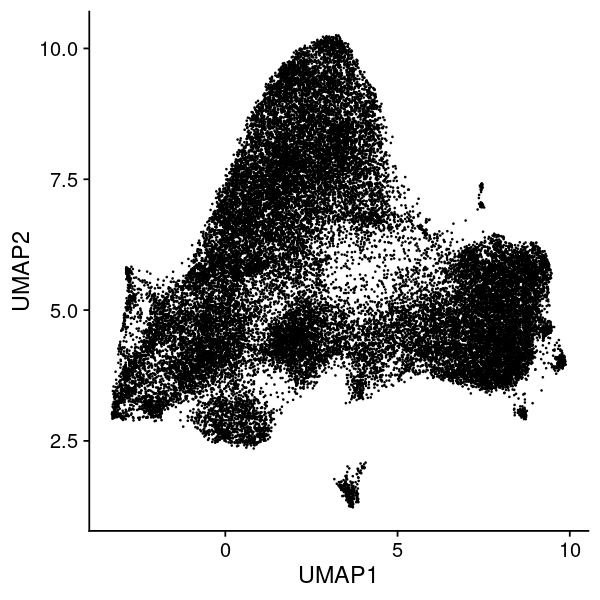

In [6]:
dat = dat_umap_chipseq_full
gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
    geom_point(size=0.1) + 
    theme_cowplot()
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

In [7]:
dat = dat_umap_chipseq_full
vec = colnames(dat)
idx = str_detect(vec, "SMAD")
vec[idx]

[1] "SMAD1" "SMAD2" "SMAD3" "SMAD4" "SMAD5"

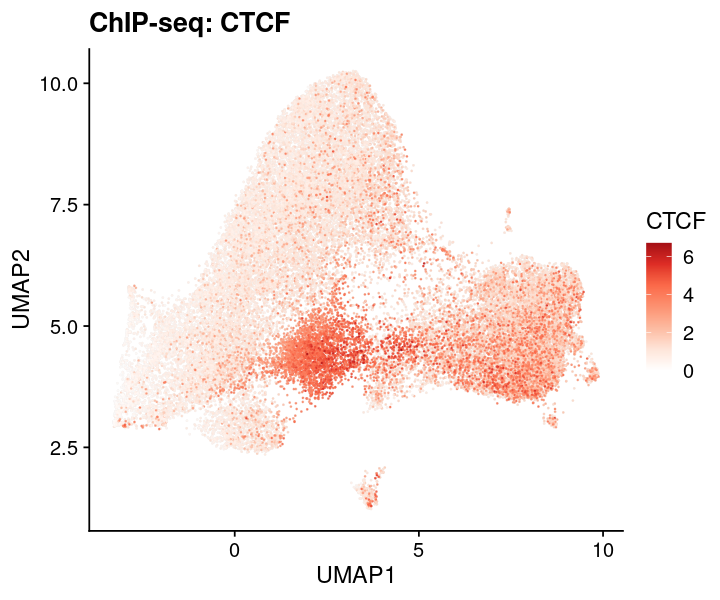

In [8]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(SMC3) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=CTCF),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: CTCF") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

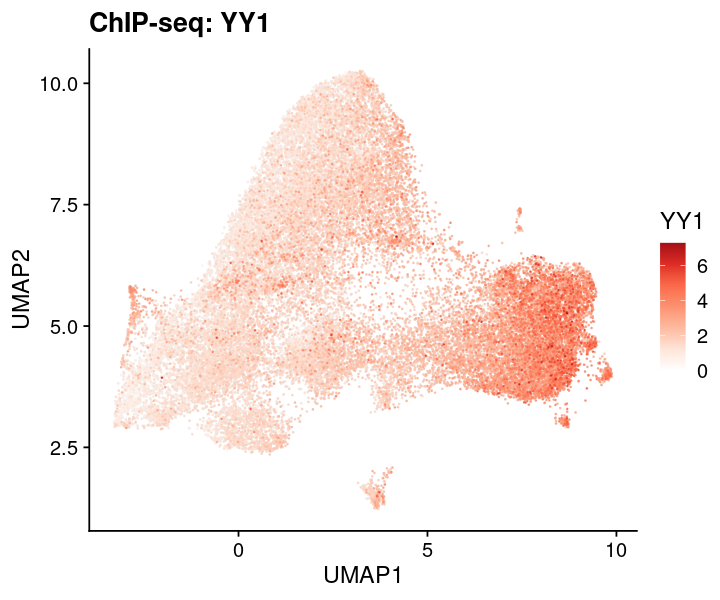

In [9]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(YY1) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=YY1),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: YY1") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

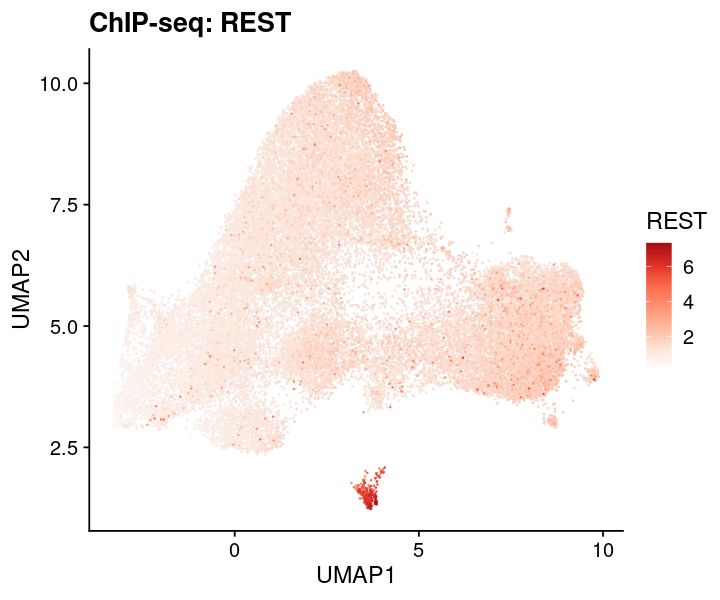

In [10]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(REST) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=REST),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: REST") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

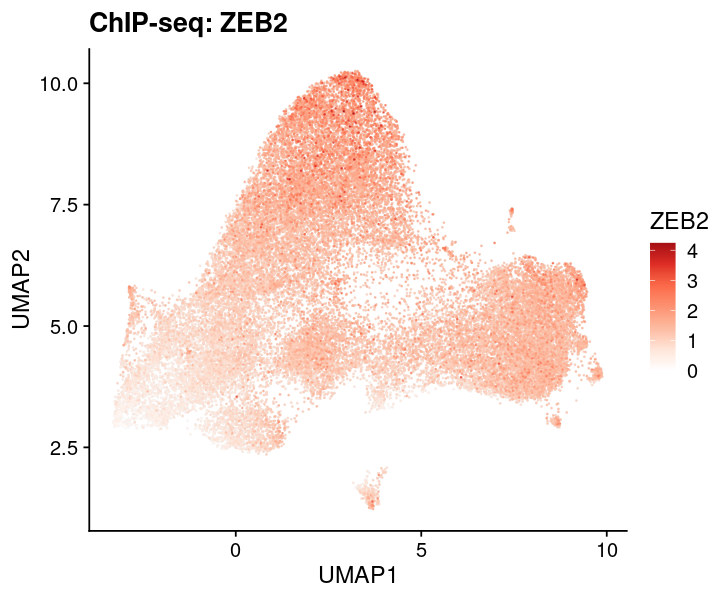

In [11]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(ZEB2) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=ZEB2),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: ZEB2") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

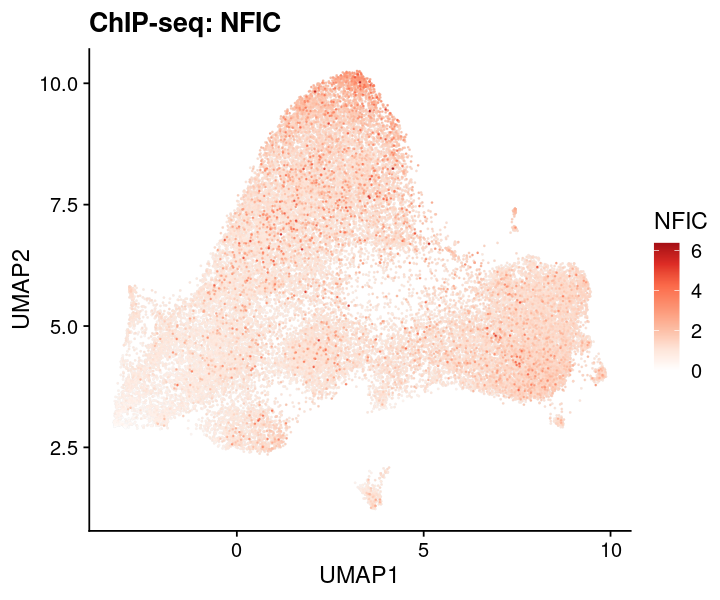

In [12]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(NFIC) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=NFIC),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: NFIC") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

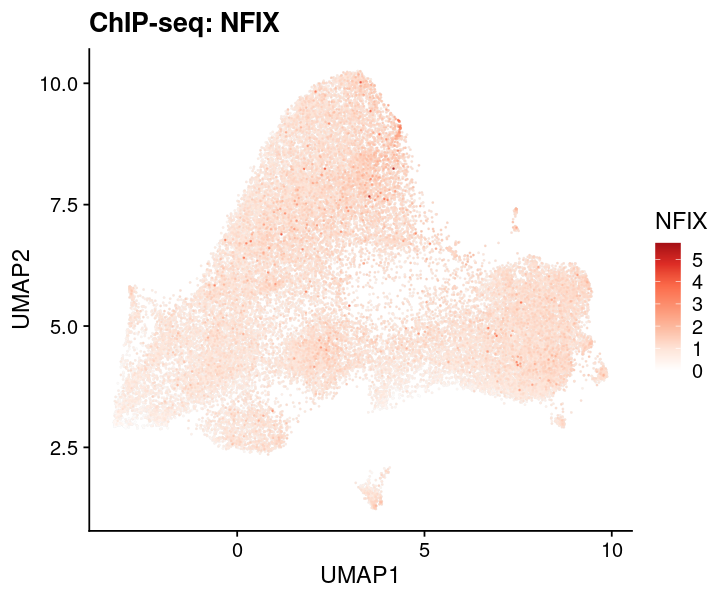

In [13]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(NFIX) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=NFIX),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: NFIX") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

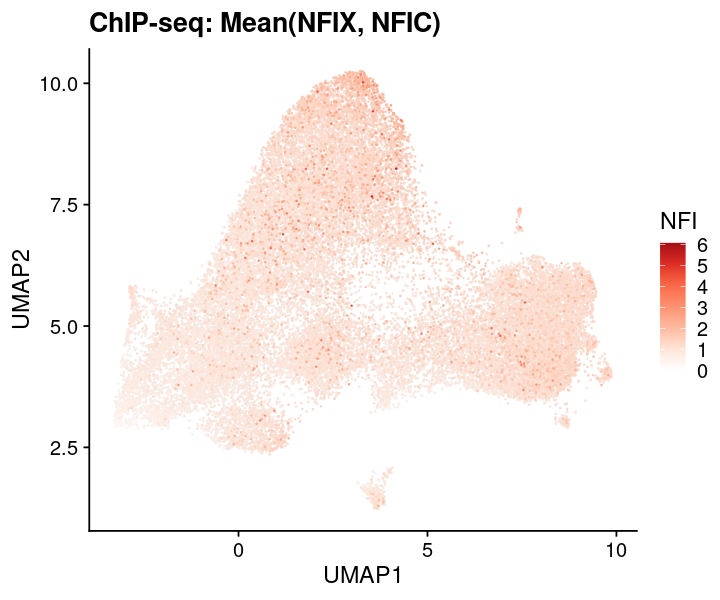

In [14]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(NFI = (NFIX + NFIC)/2)
dat = dat %>% dplyr::arrange(NFI) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=NFI),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: Mean(NFIX, NFIC)") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

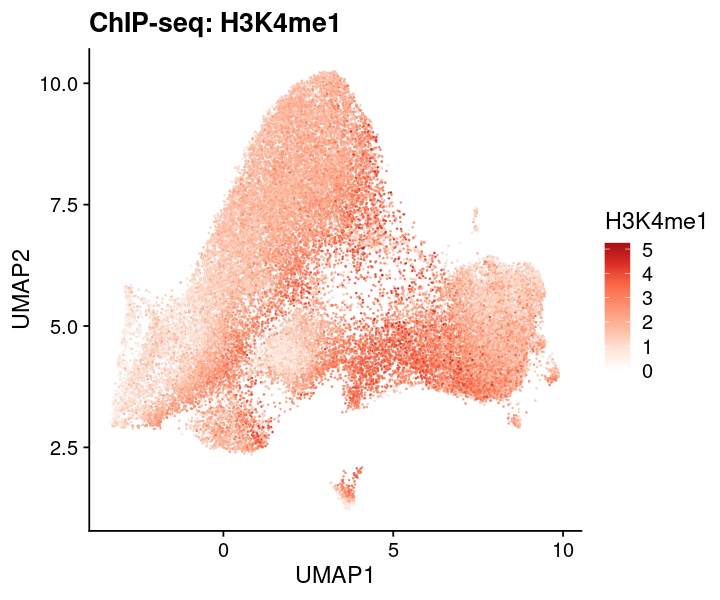

In [15]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(SMC3) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=H3K4me1),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: H3K4me1") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

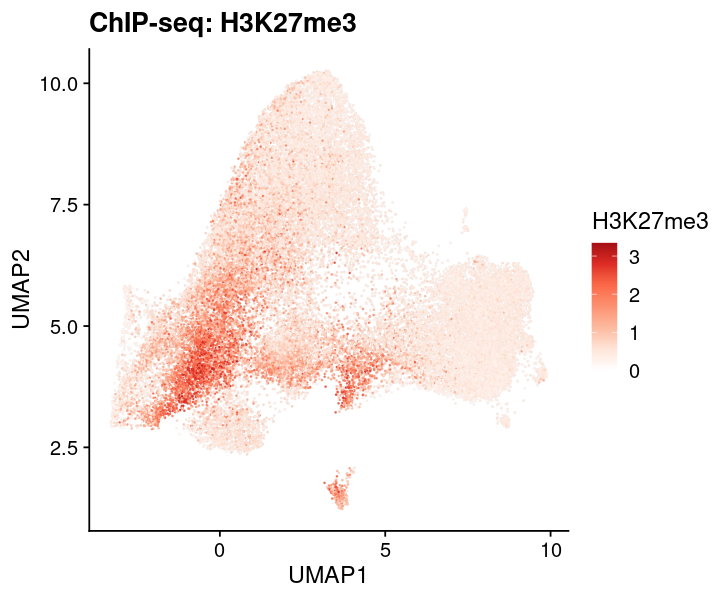

In [16]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(SMC3) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=H3K27me3),    size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: H3K27me3") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## CTCF

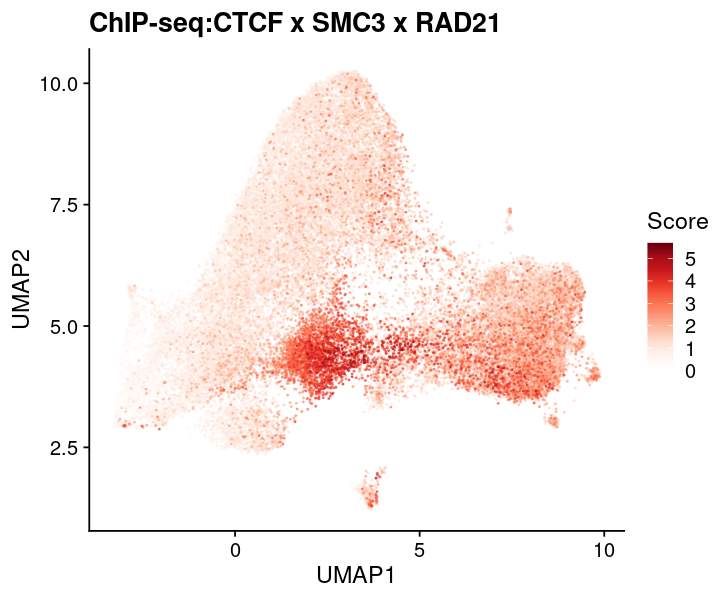

In [78]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (CTCF * SMC3 * RAD21)^(1/3))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:CTCF x SMC3 x RAD21") +
    theme_color +
    theme_text
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## AP1

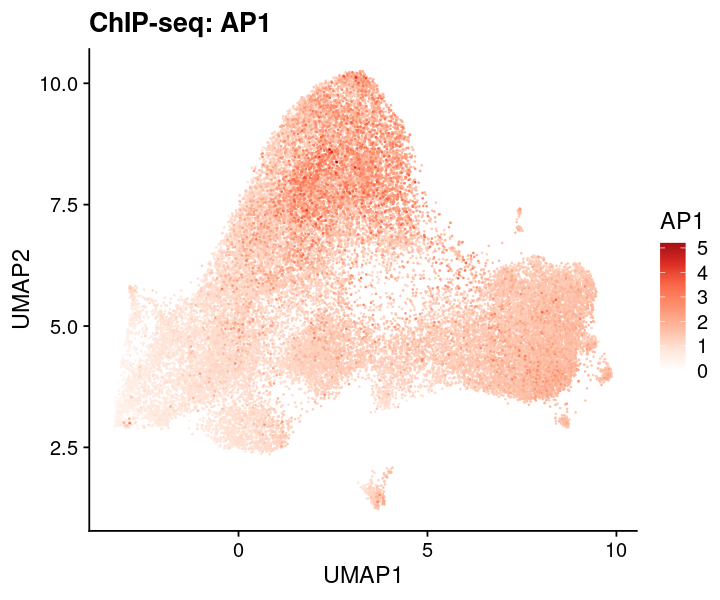

In [17]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(AP1 = (JUN * JUNB * FOSL1)^(1/3))
dat = dat %>% dplyr::arrange(AP1) #%>% dplyr::mutate(Region = factor(Region, levels=rev(unique(Region))))

gpt = ggplot() + 
    #geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=AP1),     size = 0.1) +
    theme_cowplot() +
    labs(title = "ChIP-seq: AP1") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

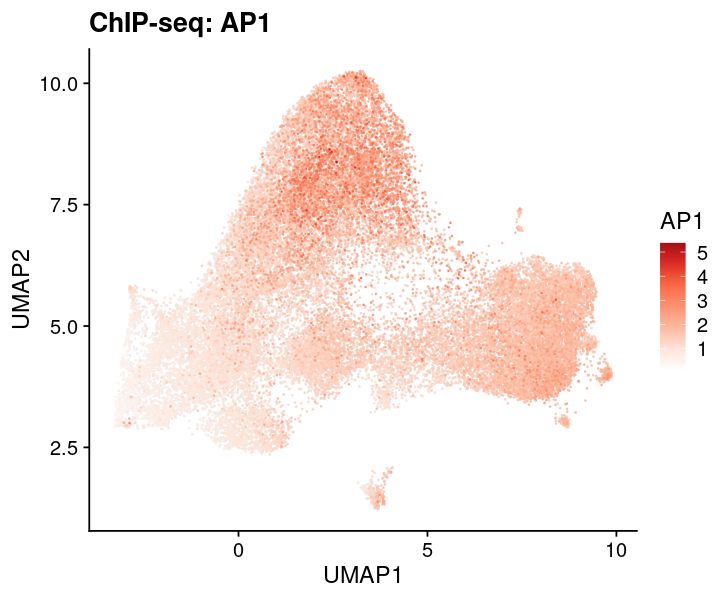

In [19]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(AP1 = (JUN + JUNB + JUND + FOSL1)/4)
dat = dat %>% dplyr::arrange(AP1) %>% dplyr::mutate(Region = factor(Region, levels=unique(Region)))

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=AP1),     size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: AP1") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

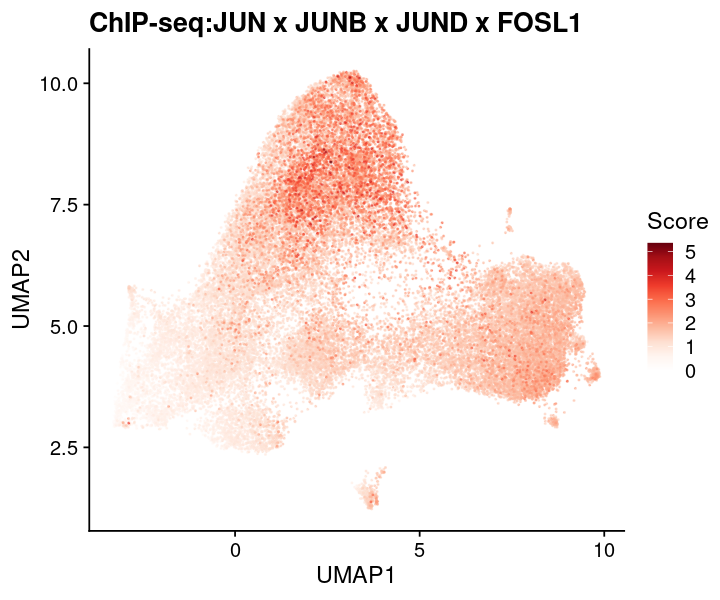

In [74]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (JUN * JUNB * JUND * FOSL1)^(1/4))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:JUN x JUNB x JUND x FOSL1") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

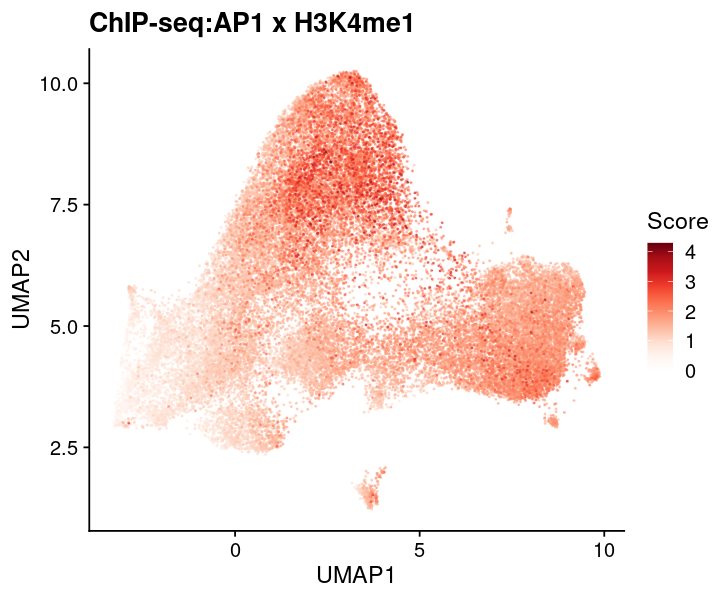

In [75]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (JUN * JUNB * JUND * FOSL1 * H3K4me1)^(1/5))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:AP1 x H3K4me1") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## MAF

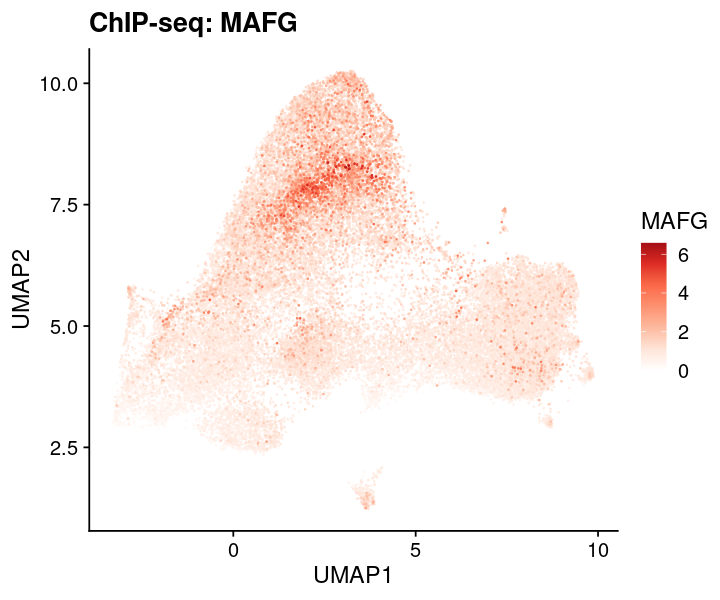

In [20]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(MAFG)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=MAFG),     size = 0.1) +
    theme_cowplot() +
    labs(title = "ChIP-seq: MAFG") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

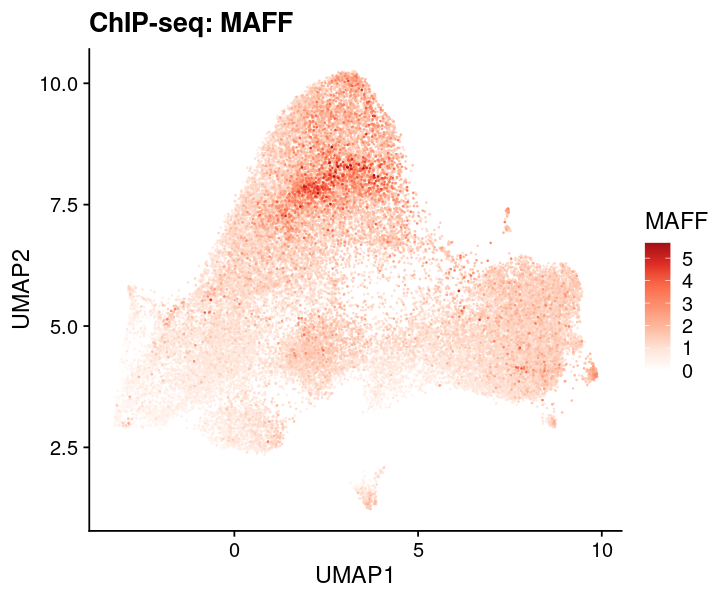

In [21]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(MAFF)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=MAFF),     size = 0.1) +
    theme_cowplot() +
    labs(title = "ChIP-seq: MAFF") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

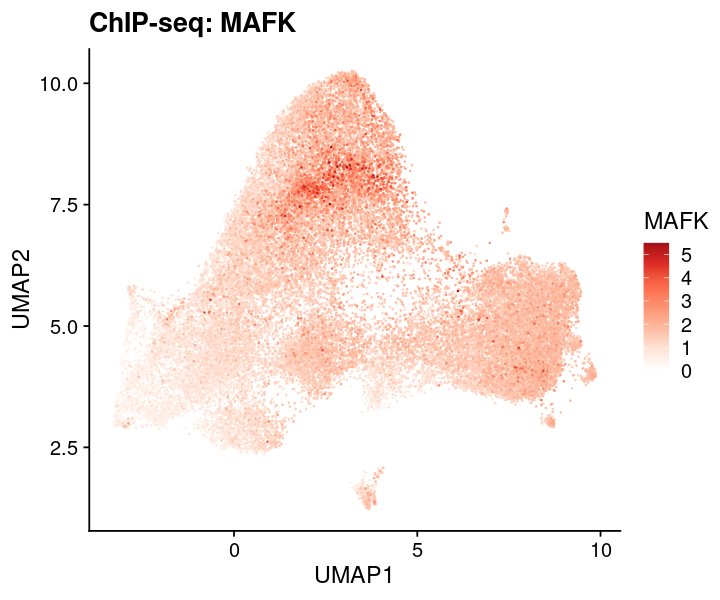

In [22]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(MAFK)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=MAFK),     size = 0.1) +
    theme_cowplot() +
    labs(title = "ChIP-seq: MAFK") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

In [79]:
dat = dat_umap_chipseq_full
vec = colnames(dat)
idx = str_detect(vec, "MAF")
vec[idx]

[1] "MAFF" "MAFG" "MAFK"

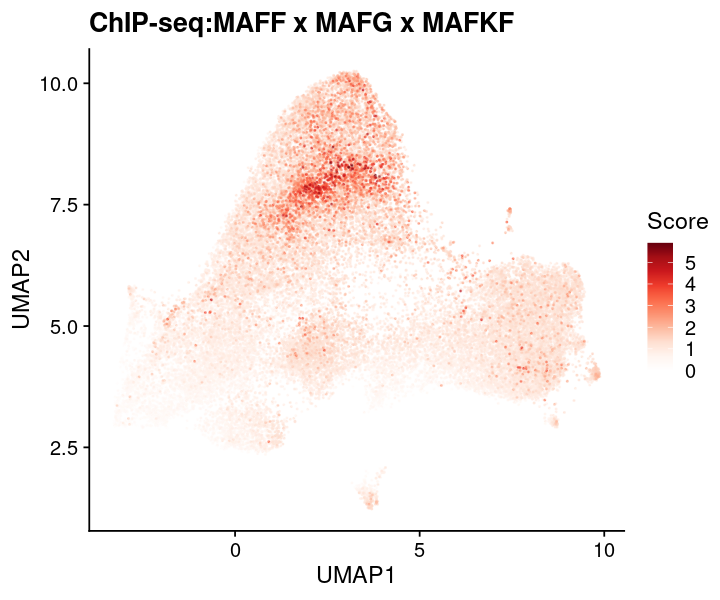

In [81]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (MAFF * MAFG * MAFF)^(1/3))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:MAFF x MAFG x MAFKF") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## MCM

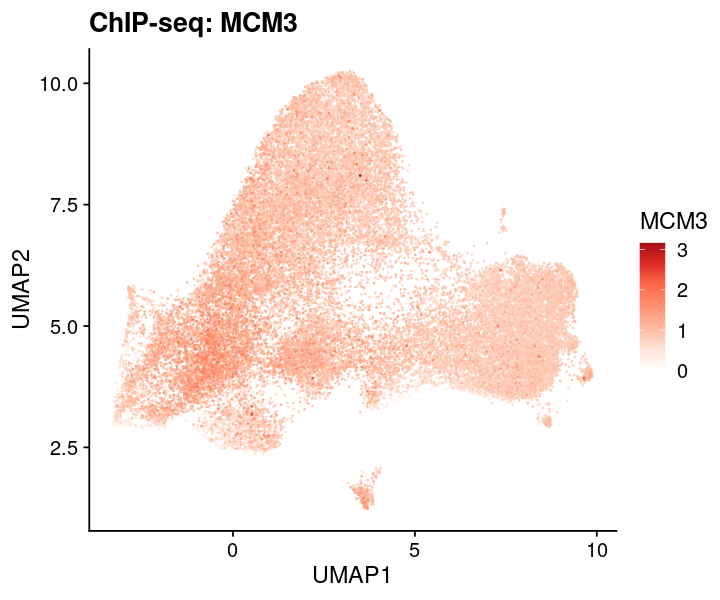

In [25]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(MCM3)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=MCM3),     size = 0.1) +
    theme_cowplot() +
    labs(title = "ChIP-seq: MCM3") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

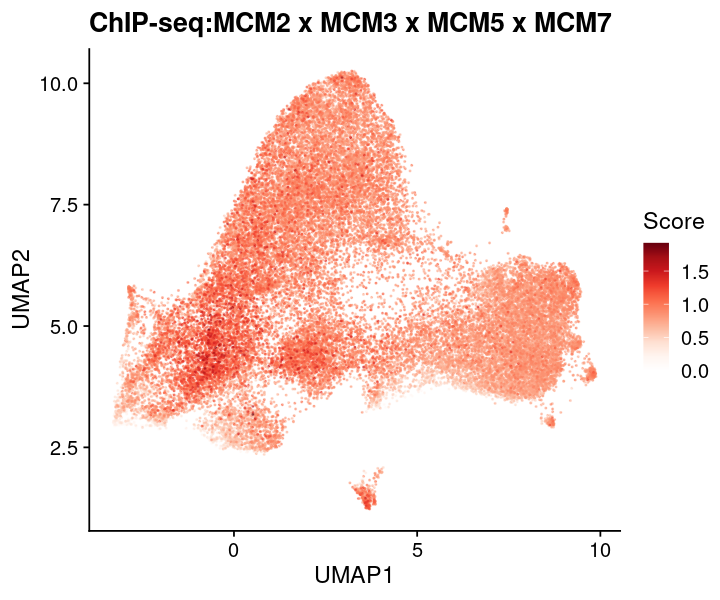

In [76]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (MCM2 * MCM3 * MCM5 * MCM7)^(1/4))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:MCM2 x MCM3 x MCM5 x MCM7") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

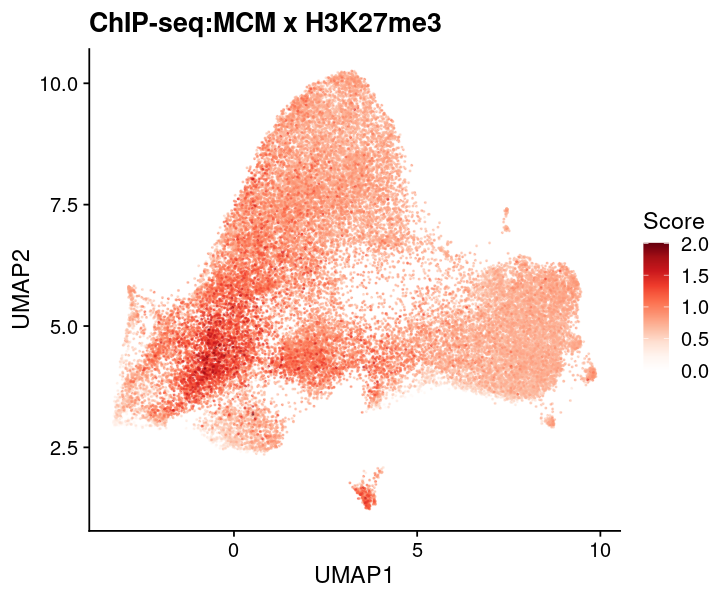

In [77]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (MCM2 * MCM3 * MCM5 * MCM7 * H3K27me3)^(1/5))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:MCM x H3K27me3") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## POLR

In [28]:
dat = dat_umap_chipseq_full
vec = colnames(dat)
idx = str_detect(vec, "POLR")
vec[idx]

[1] "POLR2A"          "POLR2AphosphoS2" "POLR2AphosphoS5" "POLR2B"         
[5] "POLR2G"          "POLR2H"

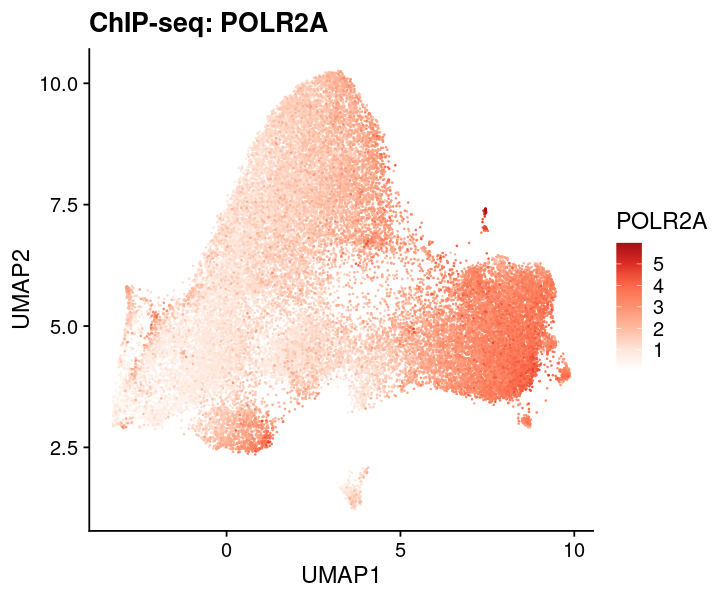

In [29]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::arrange(POLR2A)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=POLR2A), size = 0.1) +
    theme_cowplot() +
    labs(title = "ChIP-seq: POLR2A") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

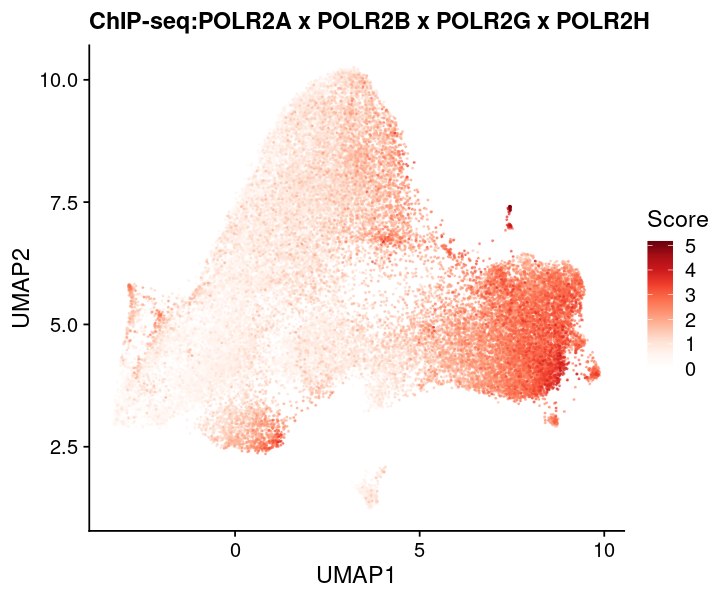

In [57]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=14))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (POLR2A * POLR2B * POLR2G * POLR2H)^(1/4))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:POLR2A x POLR2B x POLR2G x POLR2H") +
    theme_color +
    theme_text
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

### Active promoter

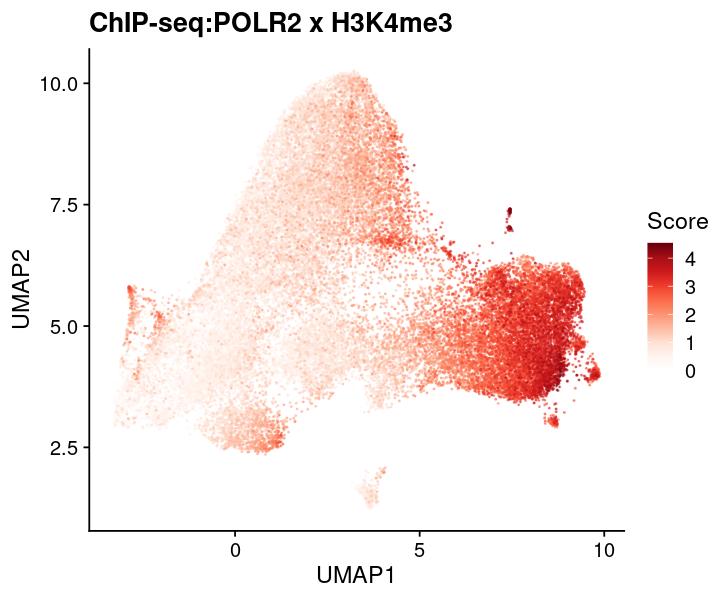

In [61]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (POLR2A * POLR2B * POLR2G * POLR2H * H3K4me3)^(1/5))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:POLR2 x H3K4me3") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

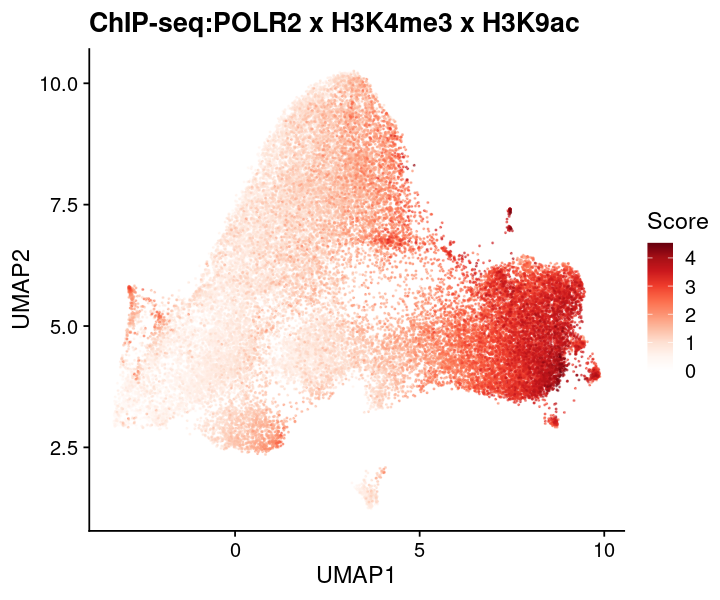

In [63]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (POLR2A * POLR2B * POLR2G * POLR2H * H3K4me3 * H3K9ac)^(1/6))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:POLR2 x H3K4me3 x H3K9ac") +
    theme_color +
    theme_text
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

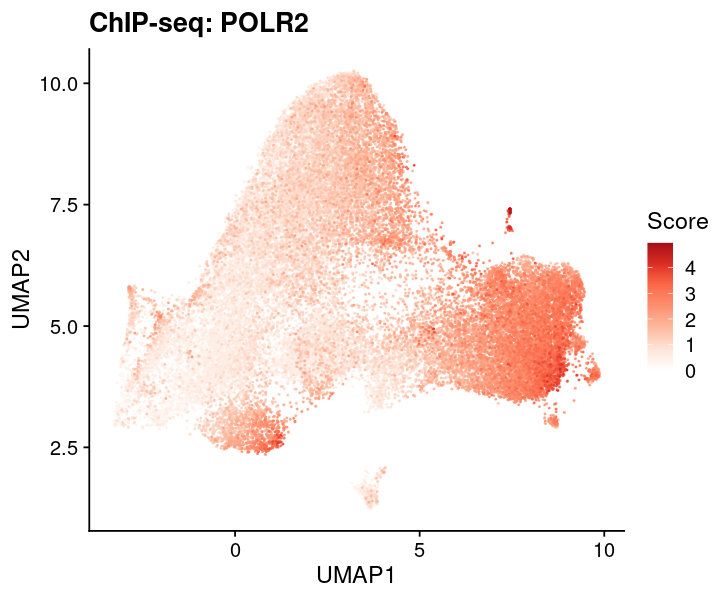

In [31]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (POLR2A * POLR2B * POLR2G * POLR2H * POLR2AphosphoS2 * POLR2AphosphoS5)^(1/6))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    #geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: POLR2") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## REST

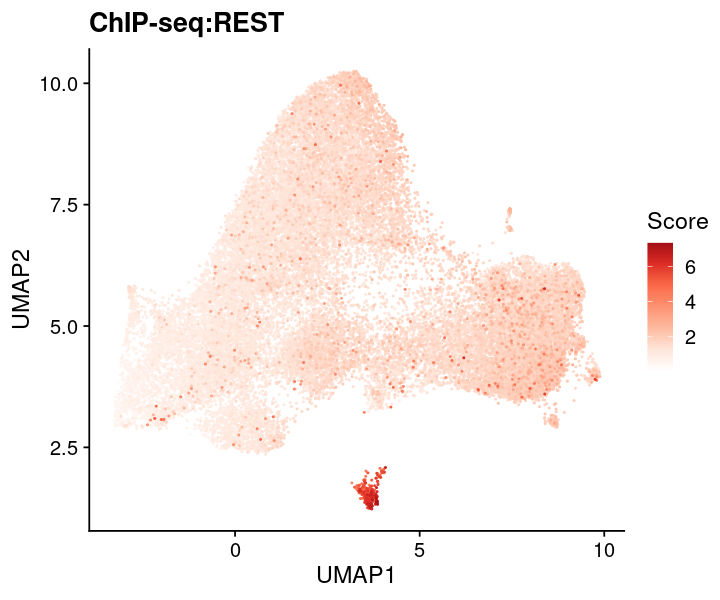

In [87]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = REST)
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    #geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 1) +
    theme_cowplot() +
    labs(title = "ChIP-seq:REST") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

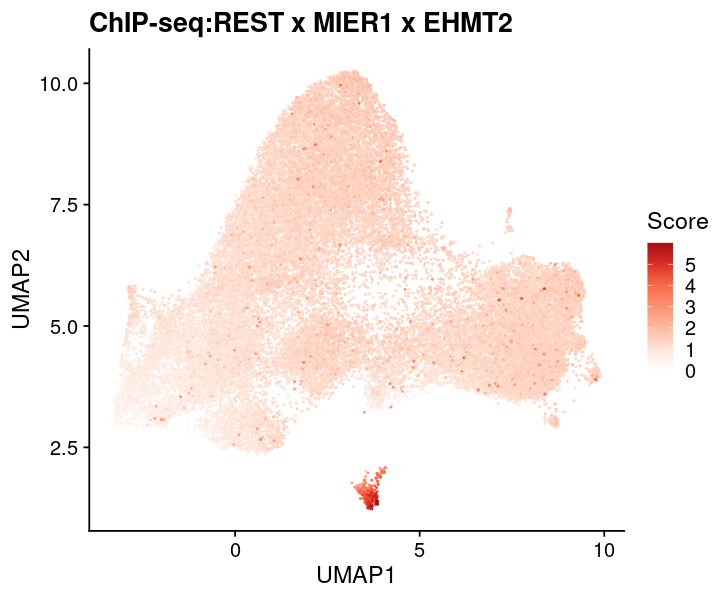

In [88]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (REST * MIER1 * EHMT2)^(1/3))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    #geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 1) +
    theme_cowplot() +
    labs(title = "ChIP-seq:REST x MIER1 x EHMT2") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## YY1

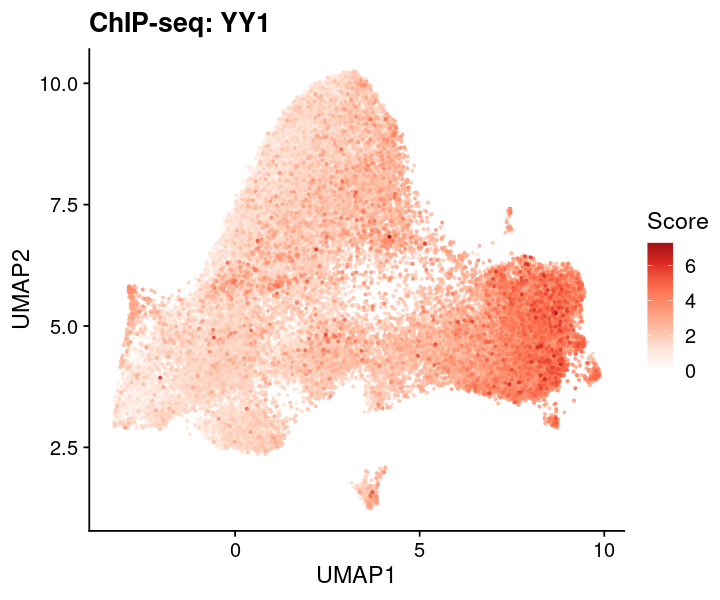

In [32]:
vec = brewer.pal("Reds", n = 6)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = YY1)
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2, color=Score), size = 0.5, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: YY1") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

## GATA

In [34]:
dat = dat_umap_chipseq_full
vec = colnames(dat)
idx = str_detect(vec, "GATA")
vec[idx]

[1] "GATA1"   "GATA2"   "GATAD2A" "GATAD2B"

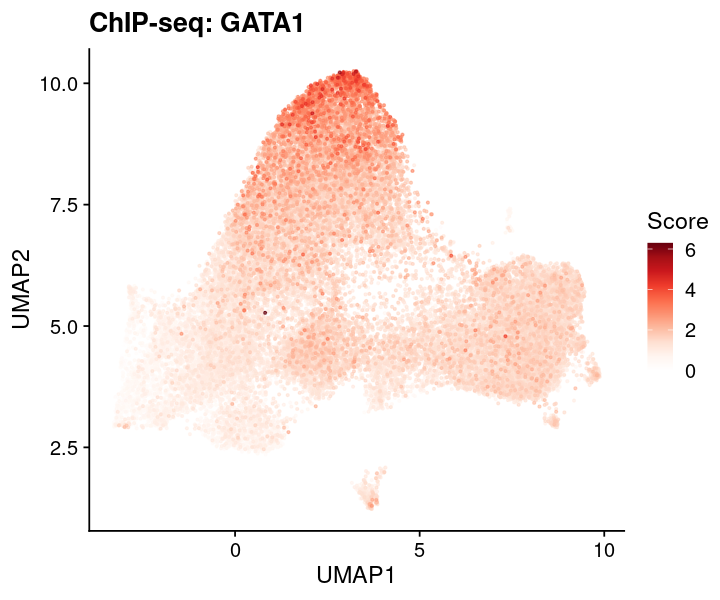

In [44]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = GATA1)
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2, color=Score), size = 0.5, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: GATA1") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

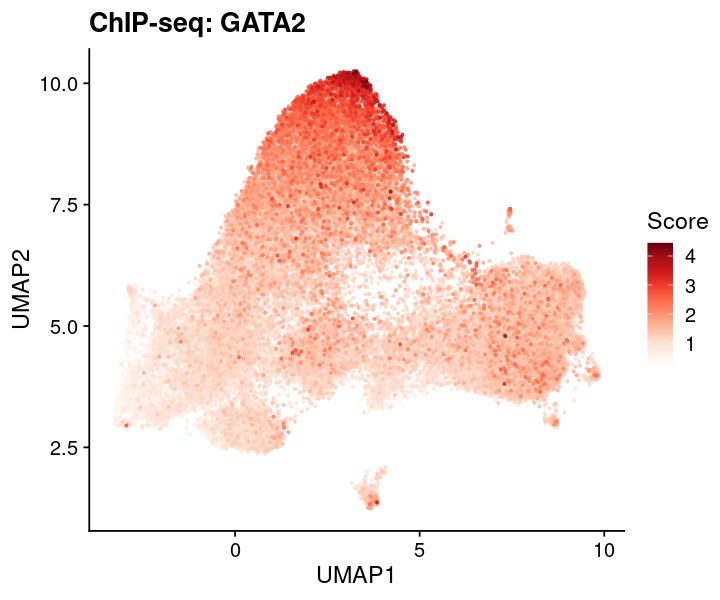

In [42]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
    
dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = GATA2)
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2, color=Score), size = 0.5, alpha = 0.7) +
    theme_cowplot() +
    labs(title = "ChIP-seq: GATA2") +
    theme_color
options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

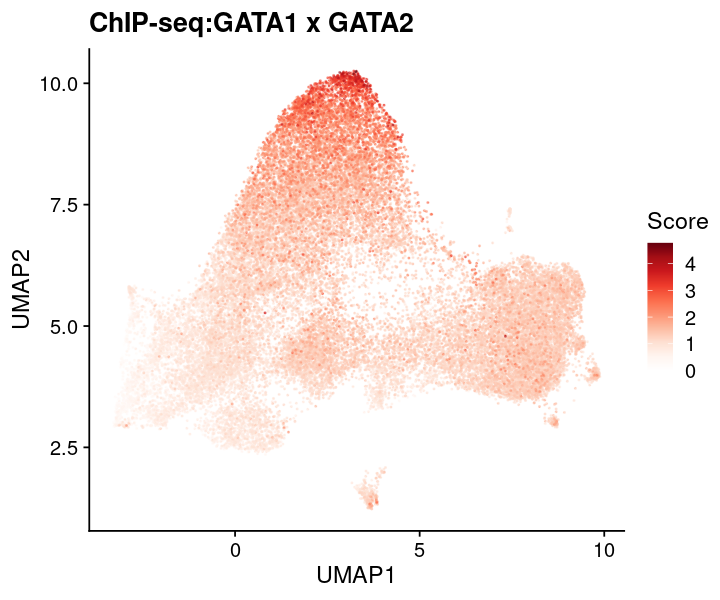

In [69]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (GATA1 * GATA2)^(1/2))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:GATA1 x GATA2") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

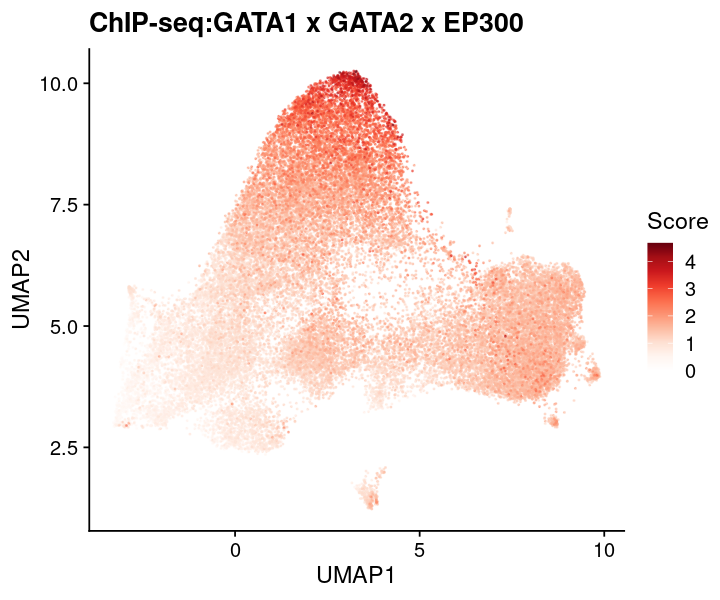

In [70]:
vec = brewer.pal("Reds", n = 9)
vec = c("#FFFFFF", vec)
vec_txt_colors = vec
theme_color = scale_colour_gradientn(colours = vec_txt_colors)
theme_text  = theme(plot.title = element_text(size=16))

dat = dat_umap_chipseq_full
dat = dat %>% dplyr::mutate(Score = (GATA1 * GATA2 * EP300)^(1/3))
dat = dat %>% dplyr::arrange(Score)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2,  color=Score), size = 0.2, alpha = 0.5) +
    theme_cowplot() +
    labs(title = "ChIP-seq:GATA1 x GATA2 x EP300") +
    theme_color +
    theme_text

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)